In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("./Training Data/Linear_X_Train.csv")
dfy = pd.read_csv("./Training Data/Linear_Y_Train.csv")

In [26]:
dfx.head(10)

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043
5,-1.675230
6,-0.746080
7,1.979400
8,0.766941
9,-0.605719


In [27]:
dfx.shape

(3750, 1)

In [28]:
dfy.shape

(3750, 1)

In [3]:
X_train = dfx.values
Y_train = dfy.values 

In [5]:
u = X_train.mean()
std = X_train.std()
X_train = (X_train-u)/std

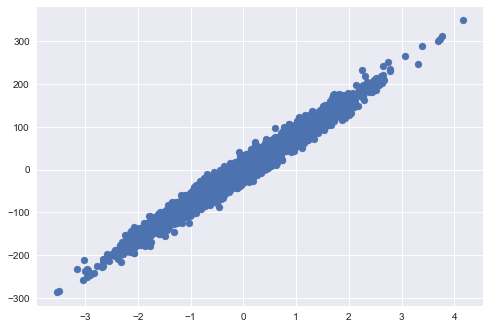

In [6]:
plt.style.use("seaborn")
plt.scatter(X_train, Y_train)
plt.show()

In [7]:
def hypothesis(x, theta):
  y_ = theta[0] + theta[1]*x
  return y_

def gradient(X, Y, theta):
  grad = np.zeros((2,))
  m = X.shape[0]

  for i in range(m):
    y_ = hypothesis(X[i], theta)
    y = Y[i]

    grad[0] += (y_ - y)
    grad[1] += (y_ - y) * X[i]

  return grad/m

def error(X, Y, theta):
  m = X.shape[0]
  tot_error = 0.0

  for i in range(m):
    y_ = hypothesis(X[i], theta)
    tot_error += (y_ - Y[i])**2
  
  return tot_error/m


def gradientDescent(X, Y, max_steps = 100, learning_rate = 0.1):
  theta = np.zeros((2,))
  error_list = []

  for i in range(max_steps):
    grad = gradient(X, Y, theta)
    e = error(X, Y, theta)
    error_list.append(e)
    theta[0] = theta[0] - learning_rate * grad[0]
    theta[1] = theta[1] - learning_rate * grad[1]

  return theta, error_list

In [8]:
theta, error_list = gradientDescent(X_train, Y_train)

In [12]:
theta

array([ 0.6838508 , 79.90361453])

In [29]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

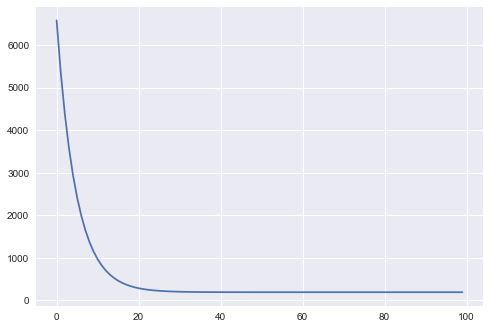

In [30]:
plt.plot(error_list)
plt.show()

In [15]:
y_ = hypothesis(X_train, theta)
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

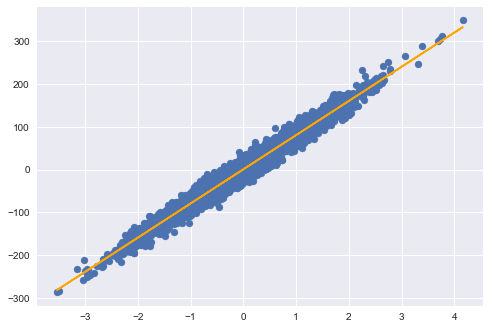

In [16]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_, color="orange")
plt.show()

In [17]:
dft = pd.read_csv("./Test Cases/Linear_X_Test.csv")

In [18]:
dft.head()

,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [19]:
dft.describe()

,x
count,1250.000000
mean,-0.040106
std,1.004994
min,-2.620627
25%,-0.713155
50%,-0.044434
75%,0.628936
max,3.700396


In [20]:
X_test = dft.values

In [21]:
Y_test = hypothesis(X_test, theta)

In [22]:
df = pd.DataFrame(data=Y_test, columns=["y"])

In [23]:
df.to_csv("y_prediction.csv", index = False)

# Accuracy

In [24]:
def accuracy(Y, y_):
  num = np.sum((Y - y_)**2)
  den = np.sum((Y - Y.mean())**2)

  return 1 - (num/den)

In [25]:
accuracy(Y_train, y_)

0.9709612226971643